In [1]:
from sklearn import tree
import pandas as pd

In [2]:
dataset = pd.read_excel("PastHires.xlsx")
dataset.head()

,Years Experience,Employed ?,Previous employers,Level Of Education,Top-tier School,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,Phd,Y,N,N


In [3]:
d = {'Y':1,'N':0}
dataset['Hired'] = dataset['Hired'].map(d)
dataset['Interned'] = dataset['Interned'].map(d)
dataset['Top-tier School'] = dataset['Top-tier School'].map(d)
dataset['Employed ?'] = dataset['Employed ?'].map(d)

e = {'BS':0,'MS':1,'Phd':2}
dataset['Level Of Education'] = dataset['Level Of Education'].map(e)

In [4]:
features = list(dataset.columns[:6])
target = dataset['Hired']

print(features)
print(target)

['Years Experience', 'Employed ?', 'Previous employers', 'Level Of Education', 'Top-tier School', 'Interned']
0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
Name: Hired, dtype: int64


In [17]:
clf = tree.DecisionTreeClassifier(max_depth=10)

x = dataset[features]
y = dataset['Hired']

clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
from IPython.display import Image
import pydotplus
import graphviz

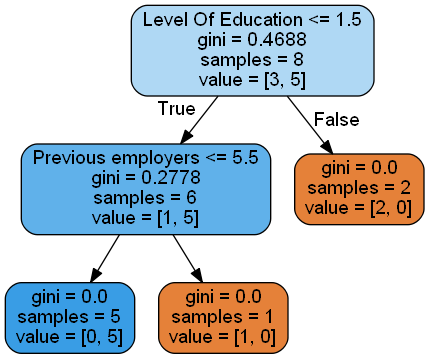

In [19]:
#dot_data = StringIO()

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features,
                               filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier(n_estimators=10)

x = dataset[features]
y = dataset['Hired']

clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
print(clf.predict([[10,1,4,0,0,0]]))

[1]
